In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version =1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y = mnist["data"],mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

There are 70000 imagees and each immage has 784 features, as the image is 28x28 pixels, the value of each feature is in range from 0 (white) to 255 (black)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]

In [7]:
some_digit_image = some_digit.reshape(28,28)

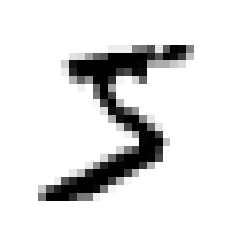

In [8]:
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [10]:
#Most ML algorithms expect numbers, so let's cast y to int
y = y.astype(np.uint8)

The MNIST we get from sklearn is actually already split into a training set (first 60000 instances) and last 60000 for the test set

In [40]:
X_train, X_test, y_train, y_test = X[:60000], X[60000,], y[:60000], y[60000:]

## Training a binary classifier

#### Let's create a "5-detector", capable of recognizing only two classes, 5 or not-5

Stochastic Gradient Descent (SGD) classifier

This classifier has the advantage of being capable of handling very large datasets efficiently as SGD deals with training instances simmultaneously.

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
y_test_5

array([False, False, False, ..., False,  True, False])

Let's check the 'some_digit' we have picked from the start to check if the model can recognize it as 5 or not.

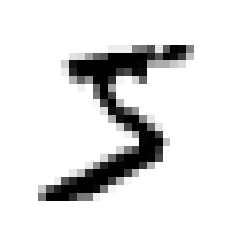

In [14]:
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [15]:
sgd_clf.predict([some_digit])

array([False])

So, the classifier doesn't think this is number 5

#### Classifier performance measures

Using stratifiedKFold 

which can perform stratified sampling to produce folds of dataset that contain a representative radio of each class as the root dataset.

For example: if the proportion of numbers "4","5","6", are 10%,15%,8% respectively.

then usinng the stratifiedKFold will create folds that maintainn the same proportion as the listed.

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state  = 42)

In [17]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9532


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.95125


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9625


Using normal cross_val_score

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv = 3,scoring = "accuracy")

array([0.86872625, 0.87639382, 0.87848177])

But still it very hard to say if this classifier performed well or not in this particular game.
Since the 5 commonly accounts for 10% of the nnummber of samples, so if the classifier say no to every test instance, the "accuracy score" still have the very high score.

So we have to use another type of measurement, which is:

Confusion Matrix.

#The idea of confusion matrix is to count the number of timmes instances of class A are wrongly classified as class B

In [20]:
#First we have to create a set of predictions.
#Try the train set first

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)

just like the cross_val_score, the cross_val_predict performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52992,  1587],
       [ 1074,  4347]])

Each row in confusion matrix represennts the actual class, 

- first row: is for instances that is ACTUALLY NOT 5 (true/false)
- second row: is for instances that is ACTUALLY 5 (false/true)

While each column represents a predicted class:

- first column: is for instances that was PREDICTED as NOT 5 (negative column)
- second column: is for instances that was PREDICTED as 5 (positive column)

So, we have:

52992: correctly predicted as not 5 (TRUE NEGATIVES)

1587: wrongly predicted as 5 (FALSE POSITIVES)

1074: wrongly predicted as not 5 (FALSE NEGATIVES)

4347: corretly predicted as 5 (TRUE POSITIVES)

Another way to innterpret the confusion mmatrix is to use 2 metrics:
    - precision
    - recall
    
As precision = TP / (TP + FP)

 \ \and recall = TP / (TP + FN)

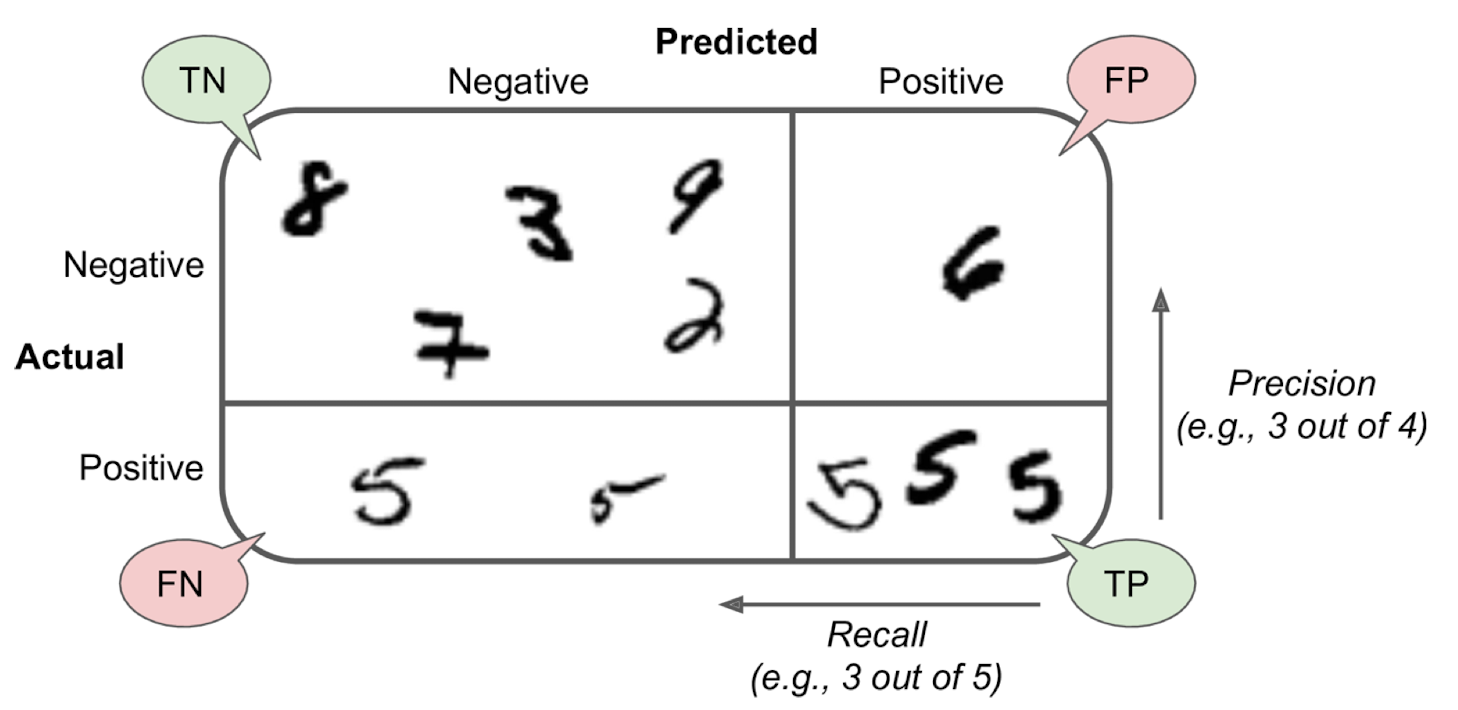

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred) # == 4347 / (4347 + 1587)

0.7325581395348837

precision = 0.732 --> when it claims an image represents a 5, it is correct only 73.2% of the time

In [23]:
recall_score(y_train_5,y_train_pred) # == 4347 / (4347 + 1074)

0.8018815716657444

recall = 0.801 --> the classifier can detects 80% of the 5 in the train set

Or we can use F1 score which is the harmonic mean of precision and recall.

The F1 score give more weight to precision or recall which tends to have lower value.

So the classifier will only get a high F1 score if both precision and recall are high.

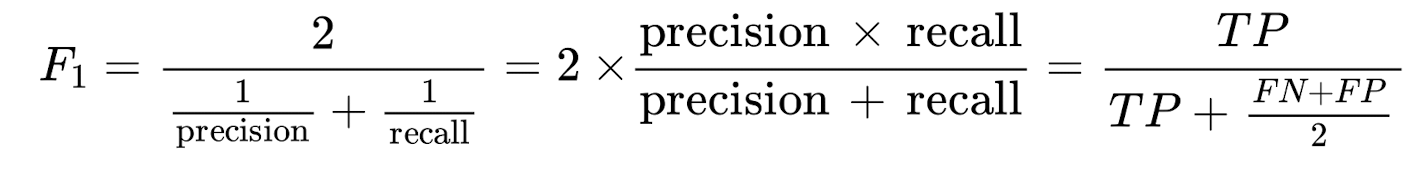

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.765653896961691

Talk about the relation between precision and recall, the increasing precision reduces recall, and vice versa.

This is called the precision/recall trade-off

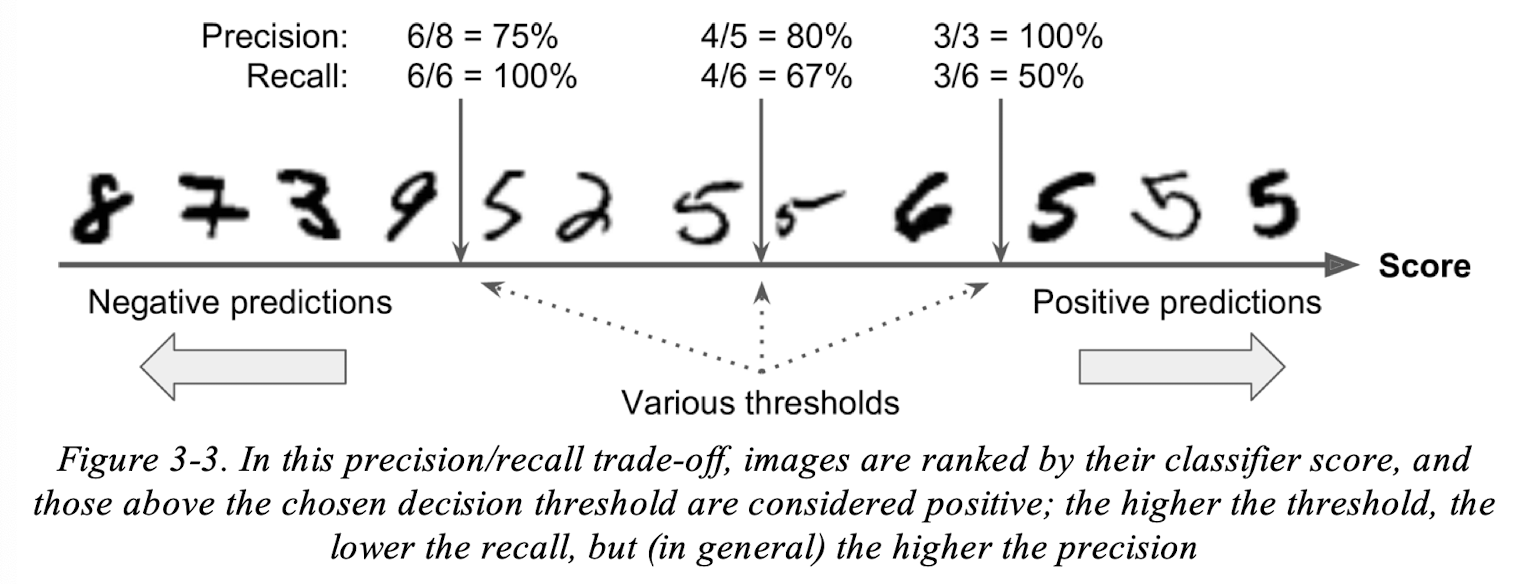

Beside the F1 score (precision and recall) measurement, we can also perform ROC (receiver operating characteristic) (common tool used with binary classifiers), to show the relation between true positive rate and false positive rate (FPR).

The FPR is the ratio of negative insntances that are inncorrectly classified as positive

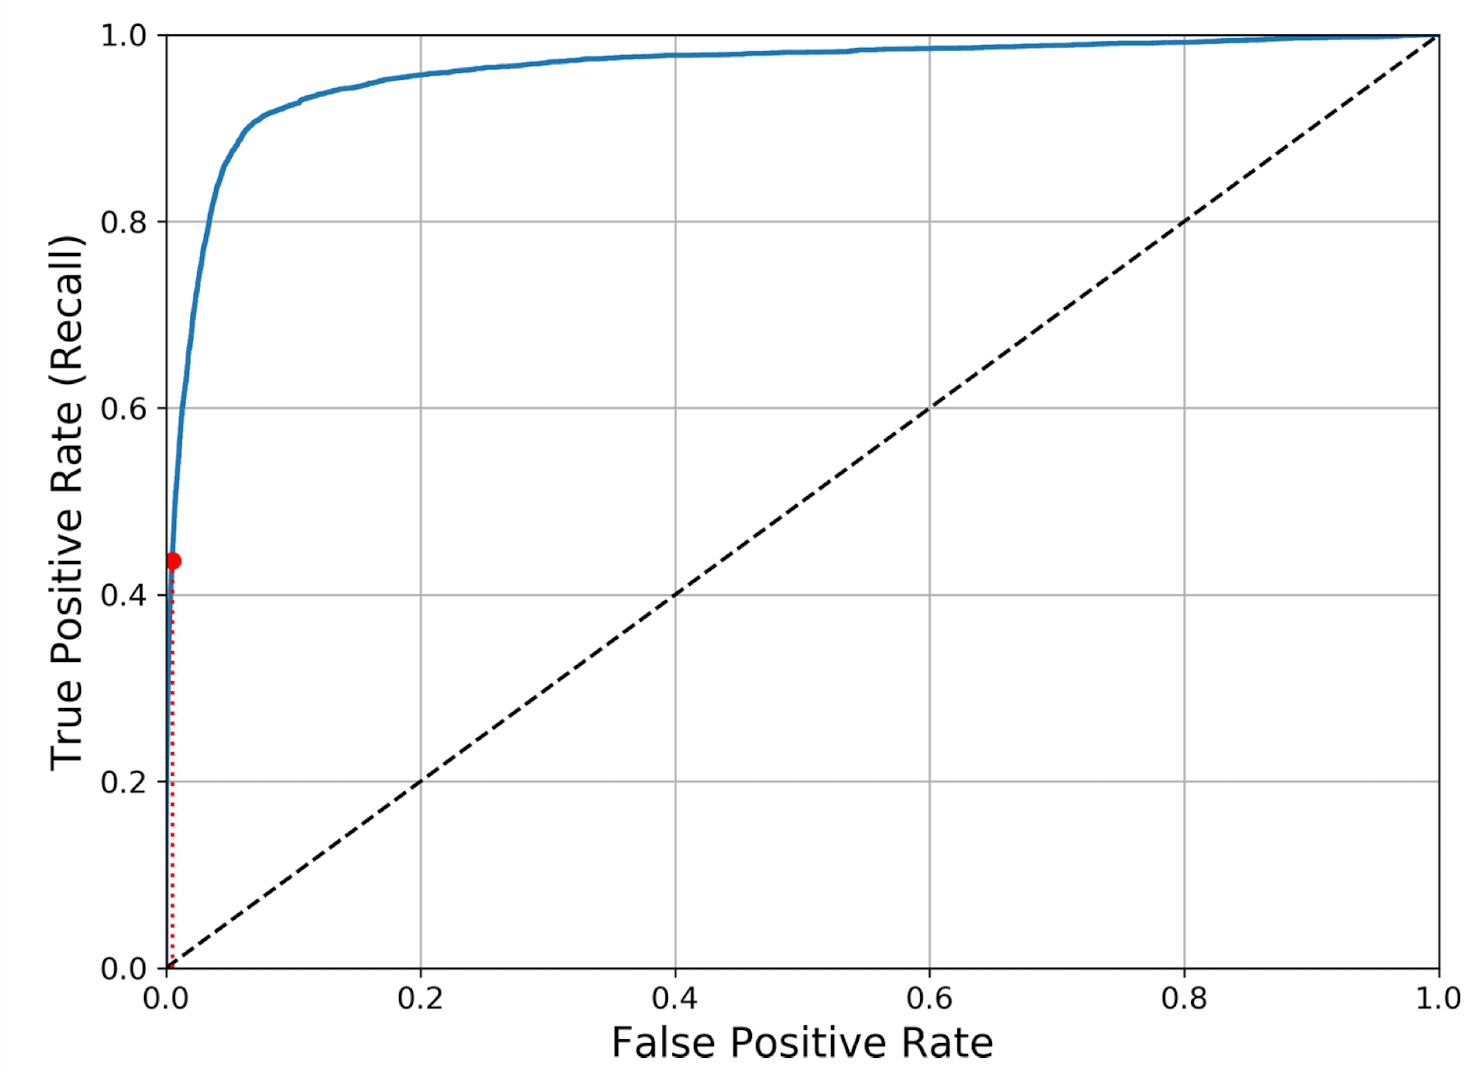

One way to compare classifier is to mmeasure the area undner the curve (AUC)

A perfect classifier will have a ROC AUC == 1,
whereas a purely random will have a ROC AUC equal to 0.5

In [26]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method = "decision_function")


from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9584692857783504

**So use P/R whenerver the positive class is rare or when we care more about the false positive than the false negative**

The example is above, we can see the score of ROC AUC is 95%, which high, the the reason is because the number of non-5 (negative) instances is so many compared to positives.

### Random forest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5, cv =3,
                                   method = "predict_proba")

In [28]:
y_scores_forest = y_probas_forest[:,1] #score = probability of positive class


#compute roc auc score for random forest classifier
roc_auc_score(y_train_5,y_scores_forest)

0.9920527492698306

In [31]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

#compute precision score for random forest classifier
precision_score(y_train_5, y_train_pred_forest)

0.986046511627907

In [32]:

#compute recall score for random forest classifier
recall_score(y_train_5, y_train_pred_forest)

0.8212506917542889

## Multiclass classification

Stricly **binary** classifier:
- Logistic Regression
- Support Vector Machine

Capable of handling **multiple classes** classification:
- SGD classifier
- Random Forest classifier
- Naive Bayes classifier

#### Multiclass classification usinng SDG classifier

In [41]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [42]:
#The decision_function method will return one value per class
sgd_clf.decision_function([some_digit])

array([[-433195.51807197, -338154.39320296, -233775.78280018,
         -96549.33208399, -775699.13613034,  -45148.19955869,
        -536304.97603686, -298210.05377635, -535633.57179217,
        -490653.60782097]])

In [47]:
len(sgd_clf.estimators_)

AttributeError: 'SGDClassifier' object has no attribute 'estimators_'

We can see the class 5 has the highest score.

In [43]:
#Evaluate the SGDClassifier's accuracy:
cross_val_score(sgd_clf,X_train,y_train,cv = 3, scoring = "accuracy")

array([0.86872625, 0.87639382, 0.87848177])

It all gets over 86%

But let's scale the inputs to increase the accuracy

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv = 3,scoring = "accuracy")

array([0.90736853, 0.90884544, 0.91363705])

#### Error Analysis

Let's take a closer look at our gcd model's error

In [48]:
#Using confusion matrix
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled, y_train, cv = 3)

conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5726,    2,   26,   12,   11,   47,   47,    9,   39,    4],
       [   1, 6479,   42,   33,    8,   39,    8,    9,  113,   10],
       [  55,   35, 5319,  104,   79,   20,  106,   51,  174,   15],
       [  45,   40,  145, 5372,    3,  210,   33,   50,  135,   98],
       [  17,   26,   38,    8, 5361,    5,   57,   31,   86,  213],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [  33,   22,   43,    2,   42,   90, 5640,    3,   43,    0],
       [  24,   23,   73,   29,   60,   12,    4, 5774,   18,  248],
       [  49,  165,   73,  150,   16,  153,   50,   24, 5038,  133],
       [  39,   31,   26,   92,  163,   35,    3,  177,   79, 5304]])

<Figure size 720x720 with 0 Axes>

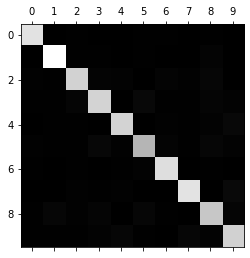

In [57]:
#Let;s make a map out of the above matrix
plt.figure(figsize = (10,10))
plt.matshow(conf_mx,cmap = plt.cm.gray)
plt.xticks(range(0,10))

plt.show()

The 5s look a bit darker than the other's, which could mean that there are fewer images of 5 in the data set

or 

the classifier does nnot perform as well on 5s as on the other digits

Let's verify by creating a grab for error rate in each class.

Dividing each value inn the confusion matrix be the number of images inn the corresponding class.


In [58]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

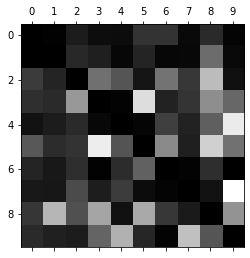

In [60]:
#Fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
plt.xticks(range(0,10))
plt.show()

Let's assume that the rows represent the actual label, and columns represent the predictions

We can see the column 8,9 and 3 are the brightest, telling that many images get misclassified as these 3 classes.

We can also see that, the number 3 and number 5's instances often gets our model confused (in both direction)

--> We can somehow gain more data about these 3 classes for the better learning of the model.

And look at some of the misclassified cases to get better insights


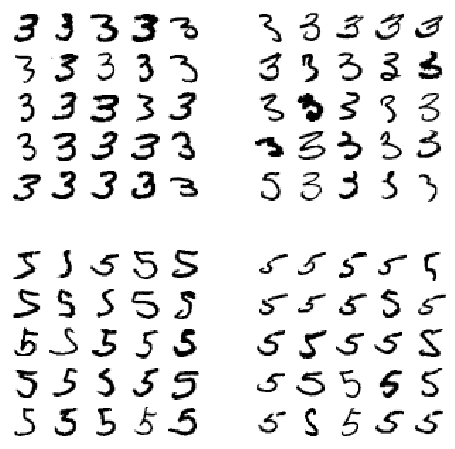

In [66]:
# EXTRA
import os
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#-------------------------------------------------

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# save_fig("error_analysis_digits_plot")
plt.show()

The 2 blocks on the left column show the images classified (predicted) as 3s:
    - The first block on top is actually 3s
    - The second block is not 3s but 5s
    
The 2 blocks on the second colummn for images predicted as 5s:
    - The first block on top is actually **5s**
    - The second block is not **5s** but 3s


## Multilabel Classification

In some cases we mmay want our classifier to output miltiple classes for each instance.

Consider face-recognition classifier: if the classifier recognize 2 person in one picture, it should be able to give the output contains name of both persons.

In [67]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [70]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [72]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

So the our mulplilabel classifier has predicted our "some_digit", which is 5, is : **smaller than 8** and **is ODD**.
This is a correct prediction for this instance.

In [ ]:
#Let's compute the f1 score of this multilabel classifier
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel, cv  = 3)

f1_score(y_multilabel,y_train_knn_pred, average = "macro")

This code assumes that all lbales are equally important.

In particular, if you have many more instances of a label than the others, we may want to give more weight to the classifier's score on that label's instances.

To do that, just change "macro" to "weighted"